In [1]:
from __future__ import print_function, division
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import glob
import copy
import neptune
#import splitfolders
import matplotlib.gridspec as gridspec

In [4]:
device = torch.device("cpu")

In [5]:
dictuar = {0:'Ясно' ,1:'Облачно' ,2:'Туман' ,3:'Мороз' ,4:'Град' ,5:'Молния' , 6:'Нет погоды', 7:'Дождь', 8:'Радуга',
           9:'Снег', 10:'Восход'}
model_ft = models.efficientnet_b4()
num_ftrs = model_ft.classifier[1].in_features
model_ft.fc = nn.Linear(num_ftrs, 11)
model_ft = model_ft.to(device)
model_ft.load_state_dict(torch.load('weights-no_weather_class-efinetb4-bestloss.pth',map_location ='cpu'))

<All keys matched successfully>

In [6]:
transform=transforms.Compose([
        transforms.Resize((256 ,256)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])


In [7]:
import PIL
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

def predict_of_image(data_dir):
    data_dir = fr"{data_dir}"
    img = Image.open(data_dir)
    img = transform(img)
    model_ft.eval()
    pred = model_ft(img.unsqueeze(0))
    return pred

In [16]:
data_dir = input('Введите путь до своей картинки ')
pred = predict_of_image(data_dir)
pred = dictuar[int(pred.argmax())]

Введите путь до своей картинки C:\Users\nicka\Downloads\NINTCHDBPICT000448906206.jpg


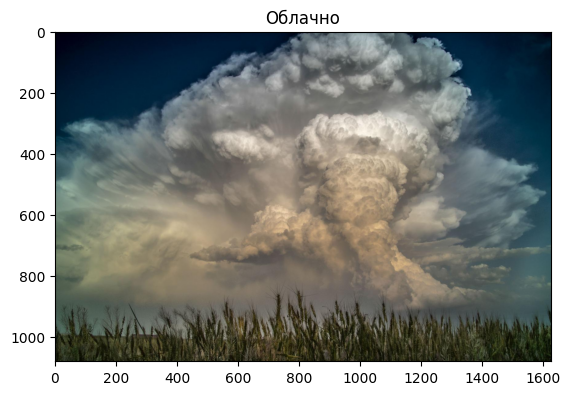

In [17]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
 
plt.title(f"{pred}")
 
image = mpimg.imread(fr"{data_dir}")
plt.imshow(image)
plt.show()